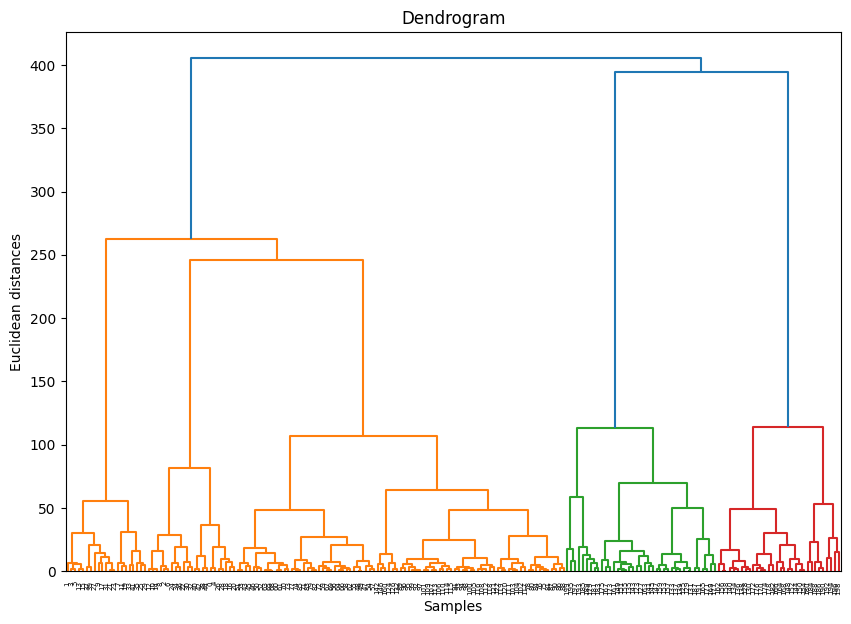

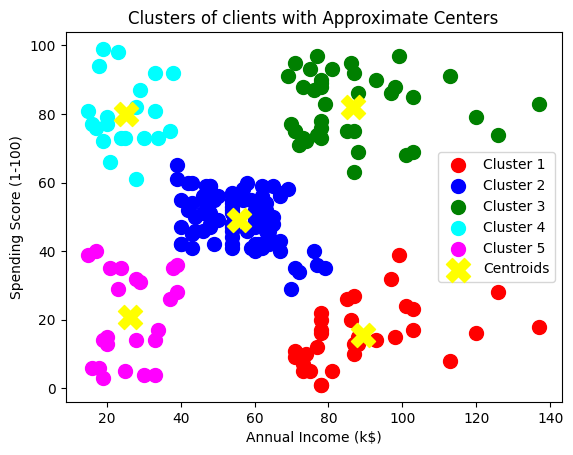

Silhouette Score: 0.5529945955148897


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the dataset
dataset = pd.read_csv('/content/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Using dendrogram to find the optimal number of clusters
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Applying Hierarchical Clustering with the optimal number of clusters (assume 5)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(X)

# Calculating the approximate cluster centers
cluster_centers = np.array([X[y_hc == i].mean(axis=0) for i in range(5)])

# Visualizing the clusters with approximate centers
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='yellow', marker='X', label='Centroids')
plt.title('Clusters of clients with Approximate Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_hc)
print("Silhouette Score:", silhouette_avg)
